<a href="https://colab.research.google.com/github/fhernand23/bsuiteAgents/blob/master/bsuite_run1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Runing a simple sample on bsuite
Import libraries

In [3]:
#@title Installing bsuite
!git clone https://github.com/deepmind/bsuite.git
!pip install -q bsuite/
import bsuite
import numpy as np

Cloning into 'bsuite'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 370 (delta 220), reused 339 (delta 189), pack-reused 0
Receiving objects: 100% (370/370), 416.96 KiB | 2.30 MiB/s, done.
Resolving deltas: 100% (220/220), done.


## Load env & run
*   Def function to run a random agent
*   Run 'bandit_noise/0'
*   Save results in csv file

In [4]:
SAVE_PATH_RAND = '/tmp/bsuite/rand'

# To run the whole experiment, simply repeat for all bsuite_id
def run_random_agent(bsuite_id, save_path=SAVE_PATH_RAND, overwrite=True):
    """Evaluates a random agent experiment on a single bsuite_id."""
    env = bsuite.load_and_record(bsuite_id, save_path, overwrite=overwrite)
    for episode in range(env.bsuite_num_episodes):
        timestep = env.reset()
        while not timestep.last():
            action = np.random.choice(env.action_spec().num_values)
            timestep = env.step(action)
    return

# for bsuite_id in sweep.BANDIT_NOISE:
#     run_random_agent(bsuite_id)
run_random_agent('bandit_noise/0')


Logging results to CSV file for each bsuite_id in /tmp/bsuite/rand.


In [0]:
#@title We have logged results as CSV files in SAVE_PATH
from bsuite.logging import csv_load
DF, _ = csv_load.load_bsuite(SAVE_PATH_RAND)

In [6]:
#@title The bsuite data is now collated and processed in DF
DF.head()

,episode,episode_len,episode_return,steps,total_regret,total_return,bsuite_id,results_dir,bsuite_env,chain_length,height_threshold,memory_length,n_distractor,noise_scale,num_bits,reward_scale,seed,size,x_reward_threshold,agent_name
0,1,1,1.176405,1,0.0,1.176405,bandit_noise/0,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,0.0,NaN,NaN,/tmp/bsuite/rand
1,2,1,0.140016,2,0.9,1.316421,bandit_noise/0,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,0.0,NaN,NaN,/tmp/bsuite/rand
2,3,1,0.997874,3,1.0,2.314295,bandit_noise/0,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,0.0,NaN,NaN,/tmp/bsuite/rand
3,4,1,0.324089,4,1.9,2.638384,bandit_noise/0,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,0.0,NaN,NaN,/tmp/bsuite/rand
4,5,1,0.586756,5,2.5,3.225140,bandit_noise/0,/tmp/bsuite/rand,bandit_noise,NaN,NaN,NaN,NaN,0.1,NaN,NaN,0.0,NaN,NaN,/tmp/bsuite/rand


In [7]:
#@title We can make use of bsuite summary scoring... and the random agent scores essentially zero
from bsuite.experiments import summary_analysis
BSUITE_SCORE = summary_analysis.bsuite_score(DF)
BSUITE_SCORE

,bsuite_env,finished,score,tags,type
0,bandit_noise,True,0.0,"('noise',)",noise


tags=('noise',)


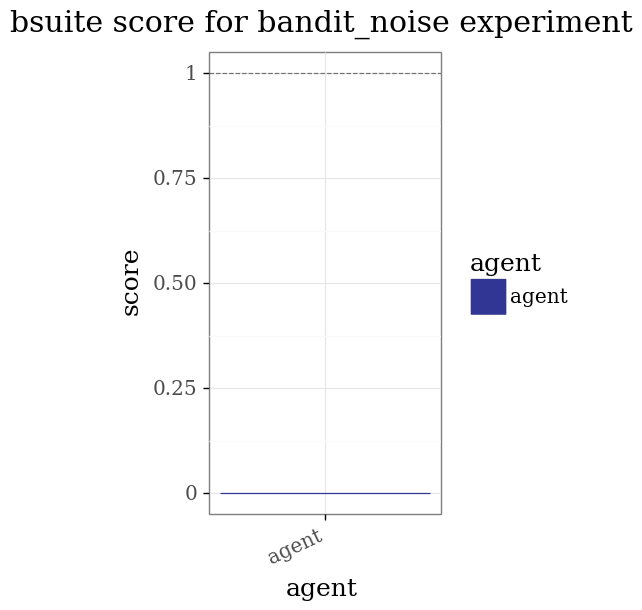

<ggplot: (-9223363282840343513)>

In [8]:
#@title As well as plots specialized to the experiment
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE, 'bandit_noise')

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


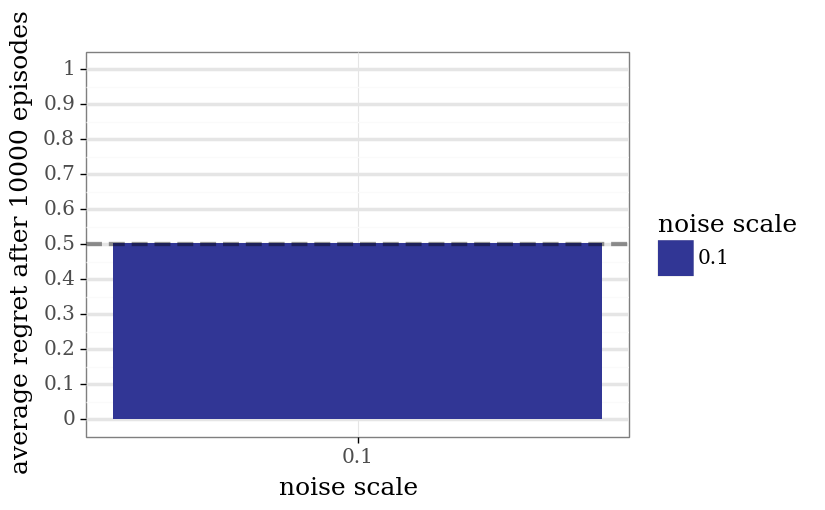

<ggplot: (-9223363282843719627)>

In [9]:
#@title average regret over learning (lower is better)
from bsuite.experiments.bandit_noise import analysis as bandit_noise_analysis
bandit_noise_analysis.plot_average(bandit_noise_df)